In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

In [2]:
df=pd.read_csv("ProyecoReady.csv")

In [3]:
df.head()

,gameid,side,position,player,team,champion,ban1,ban2,ban3,ban4,...,goldat10,gdat10,goldat15,gdat15,xpat10,xpdat10,csat10,csdat10,csat15,csdat15
0,1070340,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,...,3078,-362,4670,-798,4530,-521,76,-14,116,-6
1,1070340,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,...,3684,-371,4912,-1366,3679,-249,60,-4,88,-17
2,1070340,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,...,3926,357,5487,-629,4751,218,88,3,131,-19
3,1070340,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,...,3579,-390,5313,-1829,3526,-6,87,11,119,-15
4,1070340,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,...,2088,-306,3163,-1156,2731,355,4,1,6,1


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['side_int'] = label_encoder.fit_transform(df.side)
df.head()

,gameid,side,position,player,team,champion,ban1,ban2,ban3,ban4,...,gdat10,goldat15,gdat15,xpat10,xpdat10,csat10,csdat10,csat15,csdat15,side_int
0,1070340,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,...,-362,4670,-798,4530,-521,76,-14,116,-6,0
1,1070340,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,...,-371,4912,-1366,3679,-249,60,-4,88,-17,0
2,1070340,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,...,357,5487,-629,4751,218,88,3,131,-19,0
3,1070340,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,...,-390,5313,-1829,3526,-6,87,11,119,-15,0
4,1070340,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,...,-306,3163,-1156,2731,355,4,1,6,1,0


In [7]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
side = one_hot_encoder.fit_transform(df.side_int.values.reshape(-1,1)).toarray()
side_int = pd.DataFrame(side, columns = ["side_" + str(int(i)) for i in range(side.shape[1])])

C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
df = pd.concat([side_int, df], axis=1)

In [9]:
df.head()

,side_0,side_1,gameid,side,position,player,team,champion,ban1,ban2,...,gdat10,goldat15,gdat15,xpat10,xpdat10,csat10,csdat10,csat15,csdat15,side_int
0,1.0,0.0,1070340,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,...,-362,4670,-798,4530,-521,76,-14,116,-6,0
1,1.0,0.0,1070340,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,...,-371,4912,-1366,3679,-249,60,-4,88,-17,0
2,1.0,0.0,1070340,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,...,357,5487,-629,4751,218,88,3,131,-19,0
3,1.0,0.0,1070340,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,...,-390,5313,-1829,3526,-6,87,11,119,-15,0
4,1.0,0.0,1070340,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,...,-306,3163,-1156,2731,355,4,1,6,1,0


In [10]:
#side_0 blue
#side_1 red

In [16]:
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 14].values

In [17]:
X

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [18]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))
y_pred

Desempeño del modelo:  -0.004690298319163899


array([0.48701299, 0.48701299, 0.48701299, 0.48701299, 0.48701299,
       0.52202643, 0.52202643, 0.48701299, 0.52202643, 0.52202643,
       0.48701299, 0.48701299, 0.52202643, 0.48701299, 0.52202643,
       0.52202643, 0.52202643, 0.48701299, 0.52202643, 0.48701299,
       0.52202643, 0.52202643, 0.52202643, 0.48701299, 0.48701299,
       0.52202643, 0.52202643, 0.48701299, 0.52202643, 0.48701299,
       0.48701299, 0.52202643, 0.48701299, 0.48701299, 0.52202643,
       0.48701299, 0.52202643, 0.48701299, 0.52202643, 0.52202643,
       0.52202643, 0.52202643, 0.48701299, 0.52202643, 0.48701299,
       0.48701299, 0.52202643, 0.52202643, 0.52202643, 0.52202643,
       0.52202643, 0.48701299, 0.48701299, 0.48701299, 0.48701299,
       0.48701299, 0.52202643, 0.48701299, 0.52202643, 0.48701299,
       0.48701299, 0.48701299, 0.52202643, 0.52202643, 0.48701299,
       0.52202643, 0.48701299, 0.52202643, 0.48701299, 0.52202643,
       0.48701299, 0.48701299, 0.52202643, 0.52202643, 0.52202

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(X_train))
df_pca.head()

,0,1
0,0.713282,1.897716e-15
1,-0.700931,3.905014e-17
2,0.713282,3.494713e-17
3,-0.700931,3.905014e-17
4,-0.700931,3.905014e-17


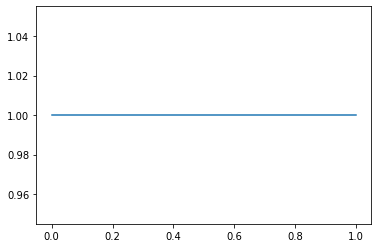

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('')
plt.ylabel('')
plt.show()

El mismo numero de juegos se gano del lado azul que del lado rojo 